In [1]:
import lightkurve as lk
# from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt
import astropy.units as u
import phoebe as pb
# import tkinter
# import matplotlib
# matplotlib.use('TkAgg')

In [4]:
pixelfile = search_targetpixelfile("TIC 244203955").download();
pixelfile.plot(frame=1);

NameError: name 'search_targetpixelfile' is not defined

In [2]:
TIC = 'TIC 244203955'

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

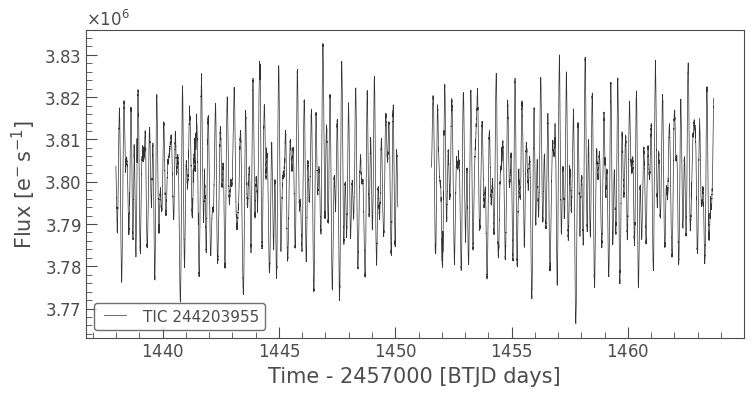

In [3]:
search_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 5)
lc = search_data.download()
lc.plot()
#plt.show()

In [6]:
flat = lc.flatten()
flat_rem = flat.remove_outliers()
flat_rem.plot()
#plt.show()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

In [7]:
normalized_lc = lc.normalize()
normalized_lc.plot()
#plt.show()
normalized_percent = lc.normalize('percent')
normalized_lc.plot()
#plt.show()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

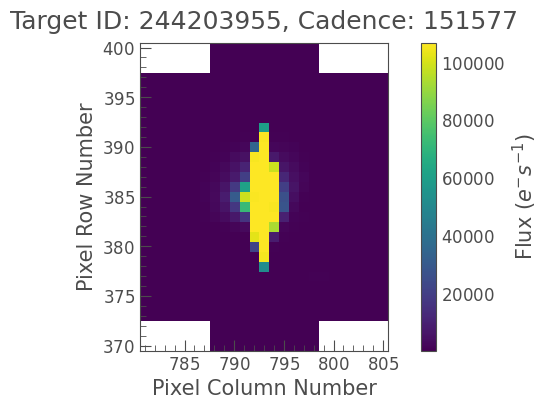

In [4]:
pixel_data = lk.search_targetpixelfile(TIC, author = 'SPOC')
tpf = pixel_data.download()
tpf.plot()
plt.show()

In [ ]:
tpf.get_header(ext=0)

In [10]:
tpf.path
print(tpf.time)

[1437.98383795 1437.98522688 1437.98661582 ... 1464.28678104 1464.28816991
 1464.29094766]


In [9]:
logger = pb.logger()
b = pb.default_binary()

In [10]:
watts_units = u.W / (u.m * u.m)
fluxes=lc['flux'] * watts_units

In [11]:
times = tpf.time.to_value('btjd')

In [13]:
b.add_dataset('lc', fluxes=flat_rem['flux']*watts_units, times=flat_rem.time.to_value('btjd'))

<ParameterSet: 80 parameters | contexts: constraint, dataset, figure, compute>

In [14]:
print(b.filter(qualifier='fluxes',context='dataset'))

ParameterSet: 1 parameters
              fluxes@lc01@dataset: [0.99937905 0.99945911 0.99971004 ... 1.001594
 1.00176981 1.00191042] W / m2


In [17]:
run_comp = b.run_compute()

Thu, 04 May 2023 13:07 BUNDLE       WARNING overwriting model: latest
100%|████████████████████████████████████| 17244/17244 [01:59<00:00, 144.14it/s]


In [ ]:
run_comp.plot(x='phase', show=True)